In [2]:
import pandas as pd
import numpy as np
import os
import openpyxl 

In [3]:
import pandas as pd

def excel_to_df(excel_file: str, sheet_name: str = None) -> pd.DataFrame:

    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    df.columns = (
        df.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace(r"[^0-9a-zA-Z_]", "", regex=True)
    )
    
    df = df.convert_dtypes()
    
    return df

In [4]:
xl_df = excel_to_df(r"C:\Users\arypn\OneDrive\Desktop\CS307\MEHOINUSA672N.xlsx", sheet_name="Annual")

xl_df.head()


,observation_date,mehoinusa672n
0,1984-01-01,60420
1,1985-01-01,61570
2,1986-01-01,63850
3,1987-01-01,64650
4,1988-01-01,65130


In [5]:
csv_df = pd.read_csv(r"C:\Users\arypn\OneDrive\Desktop\CS307\Real_Estate_Sales_2001-2023_GL.csv", encoding="utf-8")
csv_df.head(3)

C:\Users\arypn\AppData\Local\Temp\ipykernel_10300\3174339068.py:1: DtypeWarning: Columns (7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_df = pd.read_csv(r"C:\Users\arypn\OneDrive\Desktop\CS307\Real_Estate_Sales_2001-2023_GL.csv", encoding="utf-8")


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,NaN,NaN,NaN,NaN,NaN


In [6]:
xl_df.columns

Index(['observation_date', 'mehoinusa672n'], dtype='object')

In [7]:
csv_df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

In [8]:
csv_df["Date Recorded"] = pd.to_datetime(csv_df["Date Recorded"], format="%m/%d/%Y", errors="coerce")
xl_df["observation_date"] = pd.to_datetime(xl_df["observation_date"], errors="coerce")
xl_df["Year"] = xl_df["observation_date"].dt.year
csv_df = csv_df.rename(columns={"List Year": "Year"})

In [9]:
csv_df.head(2)

,Serial Number,Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN


In [10]:
merged_df = csv_df.merge(
    xl_df[["Year", "mehoinusa672n"]],
    on="Year",
    how="left"
)

In [11]:
merged_df.head(4)

,Serial Number,Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,mehoinusa672n
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014),81580
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN,81580
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,NaN,NaN,NaN,NaN,NaN,81580
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN,81580


In [12]:
# Since we are mostly focusing on pre an during covid, we will be focusing only on 2015 to 2023

In [13]:
merged_df["Date"] = merged_df["Date Recorded"]
merged_df = merged_df.drop(columns=["Non Use Code", "Assessor Remarks", "OPM remarks", "Location", "Date Recorded"])
merged_df = merged_df.sort_values("Year")

In [14]:
filtered_df = merged_df[(merged_df["Year"] >= 2015) & (merged_df["Year"] <= 2023)]

In [15]:
filtered_df.head()

,Serial Number,Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,mehoinusa672n,Date
855309,150386,2015,Southbury,147 A HERITAGE VILLAGE,58300.0,77000.0,0.757143,Condo,Condo,72790,2016-07-01
855308,150019,2015,Portland,4 PENNY CORNER ROAD,154140.0,210000.0,0.734,Single Family,Single Family,72790,2015-10-29
855307,150149,2015,Thompson,1158 RIVERSIDE DR,172300.0,198000.0,0.870202,Single Family,Single Family,72790,2016-07-06
855306,150108,2015,Plainville,69 NORTHWEST DR F-47,114450.0,143000.0,0.80035,Condo,Condo,72790,2016-01-19
855305,150081,2015,Stonington,29 WILBUR HILL RD,417200.0,590000.0,0.707119,Single Family,Single Family,72790,2015-12-23


In [16]:
filtered_df.shape

(462879, 11)

In [17]:
missing_rows = filtered_df[filtered_df.isna().any(axis=1)]
print(missing_rows.shape)
missing_rows.head(2)

(41212, 11)


,Serial Number,Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,mehoinusa672n,Date
125439,150145,2015,Portland,182 MAIN ST,715260.0,717149.0,0.997366,NaN,NaN,72790,2016-07-15
125438,15122,2015,North Haven,2 BLUE HILLS ROAD,102550.0,125000.0,0.8204,NaN,NaN,72790,2016-01-05


In [18]:
filtered_df.isna().any()

Serial Number       False
Year                False
Town                False
Address              True
Assessed Value      False
Sale Amount         False
Sales Ratio         False
Property Type        True
Residential Type     True
mehoinusa672n       False
Date                 True
dtype: bool

In [19]:
print(filtered_df[filtered_df["Property Type"].isna() & filtered_df["Residential Type"].isna()].shape)
filtered_df[filtered_df["Property Type"].isna() & filtered_df["Residential Type"].isna()].head(2)

(20525, 11)


,Serial Number,Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,mehoinusa672n,Date
125439,150145,2015,Portland,182 MAIN ST,715260.0,717149.0,0.997366,NaN,NaN,72790,2016-07-15
125438,15122,2015,North Haven,2 BLUE HILLS ROAD,102550.0,125000.0,0.8204,NaN,NaN,72790,2016-01-05


In [20]:
Cleaned_Df = filtered_df.dropna(subset=["Property Type", "Residential Type"], how="all")

In [21]:
print(Cleaned_Df.shape)
Cleaned_Df.head(2)

(442354, 11)


,Serial Number,Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,mehoinusa672n,Date
855309,150386,2015,Southbury,147 A HERITAGE VILLAGE,58300.0,77000.0,0.757143,Condo,Condo,72790,2016-07-01
855308,150019,2015,Portland,4 PENNY CORNER ROAD,154140.0,210000.0,0.734,Single Family,Single Family,72790,2015-10-29


In [22]:
cpi_dict = {
    2015: 237.017,
    2016: 240.007,
    2017: 245.120,
    2018: 251.107,
    2019: 255.657,
    2020: 258.811,
    2021: 270.970,
    2022: 292.655,
    2023: 305.109
}

import pandas as pd

cpi_df = pd.DataFrame(list(cpi_dict.items()), columns=['year', 'cpi'])


In [23]:
adj_df = Cleaned_Df.merge(cpi_df, left_on='Year', right_on='year', how='left')


In [24]:
cpi_2023 = cpi_dict[2023]

adj_df['price_2023'] = adj_df['Sale Amount'] * (cpi_2023 / adj_df['cpi'])



In [25]:
mean_price_year = (
    adj_df.groupby('Year')['price_2023']
          .mean()
          .reset_index()
          .rename(columns={'price_2023': 'mean_residential_price_2023usd'})
)



In [26]:
adj_df = adj_df.merge(mean_price_year, on='Year', how='left')
adj_df.shape

(442354, 15)

In [27]:
# Create final year-level dataset
final_year_df = (
    adj_df.groupby('Year')
          .agg({
              'price_2023': 'mean',            # mean inflation-adjusted home price
              'Sale Amount': 'mean',           # mean nominal (raw) home price
              'mehoinusa672n': 'mean'          # median household income
          })
          .reset_index()
)

final_year_df = final_year_df.rename(columns={
    'price_2023': 'mean_residential_price_2023usd',
    'Sale Amount': 'mean_raw_sale_amount',
    'mehoinusa672n': 'median_household_income'
})

final_year_df


,Year,mean_residential_price_2023usd,mean_raw_sale_amount,median_household_income
0,2015,366472.458068,284685.809313,72790.0
1,2016,496265.109321,390375.571002,75380.0
2,2017,431304.933886,346503.922841,76710.0
3,2018,384485.958065,316434.833033,77700.0
4,2019,448879.236188,376124.987745,83260.0
5,2020,713194.454130,604972.550360,81580.0
6,2021,604627.690901,536975.197072,81270.0
7,2022,581484.881788,557749.715937,79500.0
8,2023,538314.328200,538314.328200,82690.0


Research Question 1
How did Connecticut home prices change during COVID (2019–2023) vs. pre-pandemic (2015–2019)?

In [28]:
# Focus only on CT home prices 
df = final_year_df.copy()

pre = df[(df["Year"] >= 2015) & (df["Year"] <= 2019)]
during = df[(df["Year"] >= 2020) & (df["Year"] <= 2023)]

pre_mean = pre["mean_residential_price_2023usd"].mean()
during_mean = during["mean_residential_price_2023usd"].mean()

pct_change = ((during_mean - pre_mean) / pre_mean) * 100

print("Pre-pandemic mean CT home price (2015–2019):", pre_mean)
print("COVID-period mean CT home price (2020–2023):", during_mean)
print("Percent change:", pct_change, "%")


Pre-pandemic mean CT home price (2015–2019): 425481.53910530685
COVID-period mean CT home price (2020–2023): 609405.3387548988
Percent change: 43.22721028892177 %


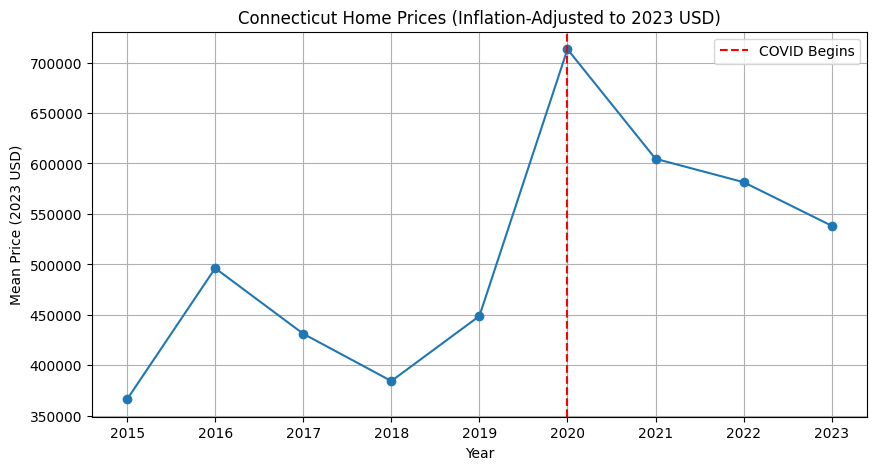

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["mean_residential_price_2023usd"], marker="o")
plt.axvline(2020, color="red", linestyle="--", label="COVID Begins")
plt.title("Connecticut Home Prices (Inflation-Adjusted to 2023 USD)")
plt.ylabel("Mean Price (2023 USD)")
plt.xlabel("Year")
plt.legend()
plt.grid()
plt.show()


Connecticut home prices experienced a substantial and sustained real increase during the COVID-19 years. This supports the idea that the pandemic fundamentally reshaped the housing market, with demand surges and limited inventory driving prices well above pre-pandemic levels. Affordability pressures likely intensified as price growth outpaced typical income gains.

In [30]:
# --- Research Question 2: How did real median household income change? ---

df = final_year_df.copy()

# Split into pre-pandemic (2015–2019) and COVID-era (2020–2023)
pre = df[(df["Year"] >= 2015) & (df["Year"] <= 2019)]
during = df[(df["Year"] >= 2020) & (df["Year"] <= 2023)]

# Calculate means
pre_income = pre["median_household_income"].mean()
during_income = during["median_household_income"].mean()

# Percent change
income_pct_change = ((during_income - pre_income) / pre_income) * 100

print("Pre-pandemic mean median household income (2015–2019):", pre_income)
print("COVID-period mean median household income (2020–2023):", during_income)
print("Percent change:", income_pct_change, "%")


Pre-pandemic mean median household income (2015–2019): 77168.0
COVID-period mean median household income (2020–2023): 81260.0
Percent change: 5.3027161517727555 %


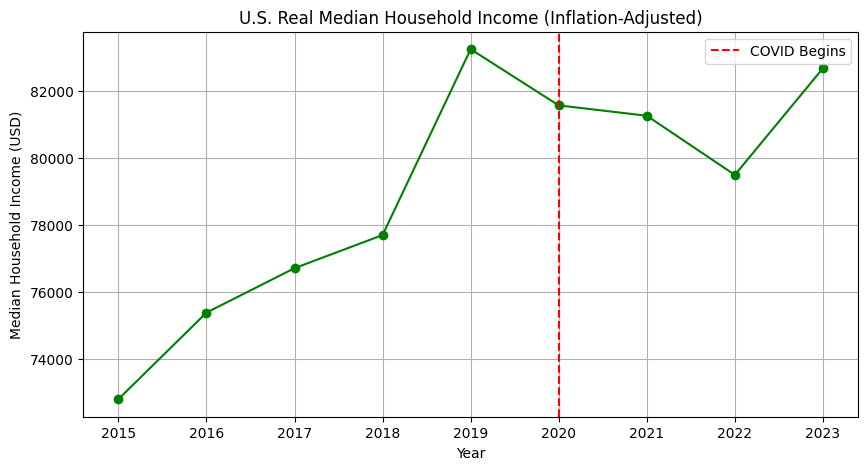

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["median_household_income"], marker="o", color="green")
plt.axvline(2020, color="red", linestyle="--", label="COVID Begins")
plt.title("U.S. Real Median Household Income (Inflation-Adjusted)")
plt.xlabel("Year")
plt.ylabel("Median Household Income (USD)")
plt.grid()
plt.legend()
plt.show()


Unlike home prices, which surged rapidly during the pandemic, real median household income showed only a small positive change across the COVID period. In fact:

Income peaked just before the pandemic (2019)

Declined in 2020–2022 due to labor market disruptions

Rebounded in 2023, but still grew only modestly overall

This suggests that while the housing market experienced extreme upward pressure, household earnings did not grow proportionally. The gap between housing costs and income likely intensified affordability challenges for many families during and after the pandemic.

In [32]:
# Correlation between household income and inflation-adjusted home prices
corr = df["median_household_income"].corr(df["mean_residential_price_2023usd"])
print("Correlation:", corr)


Correlation: 0.5871509255866934


In [33]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df["median_household_income"].values.reshape(-1, 1)
y = df["mean_residential_price_2023usd"].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0][0]
intercept = model.intercept_[0]
r2 = model.score(X, y)

print("Regression Equation: price = {:.2f} * income + {:.2f}".format(slope, intercept))
print("R-squared:", r2)


Regression Equation: price = 18.58 * income + -960292.71
R-squared: 0.34474620941731093


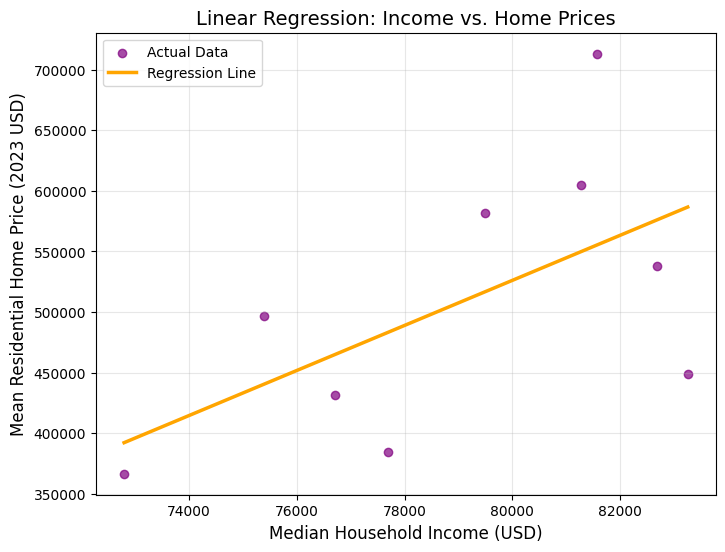

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Generate prediction line
x_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_pred = model.predict(x_range)

# Plot scatter + regression line
plt.figure(figsize=(8,6))
plt.scatter(X, y, color="purple", label="Actual Data", alpha=0.7)
plt.plot(x_range, y_pred, color="orange", linewidth=2.5, label="Regression Line")

# Labels and title
plt.title("Linear Regression: Income vs. Home Prices", fontsize=14)
plt.xlabel("Median Household Income (USD)", fontsize=12)
plt.ylabel("Mean Residential Home Price (2023 USD)", fontsize=12)

plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


While income and home prices have a moderate long-term positive relationship, **income does not account for the dramatic surge in housing prices during COVID-19**.  
The pandemic housing market was influenced primarily by **non-income factors**, leading to a widening affordability gap.  

This disconnect reinforces the idea that rising home prices during COVID-19 did not reflect improved household economic conditions—but instead structural shifts in housing demand and supply.

### **What broader conclusions can we draw about post-pandemic affordability and economic resilience?**

The combined trends in housing prices and household income reveal that the post-pandemic economy experienced a significant imbalance between property values and earnings. While home prices rose sharply during the COVID-19 period—far outpacing inflation—median household income grew only modestly. This widening gap indicates that housing affordability declined substantially, suggesting that rising property values did not reflect genuine improvements in household financial strength. Instead, the rapid escalation in home prices points to structural pressures in the housing market rather than broad-based economic recovery.

Overall, the evidence suggests that the post-pandemic period was characterized by **increased economic inequality** and a **decline in affordability**, as income growth failed to keep pace with the surging cost of homeownership. These findings highlight vulnerabilities in economic resilience, especially for households attempting to enter or remain in the housing market after the pandemic.
